In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn

## 1. Get the Data

In [2]:
df = pd.read_csv(r'C:\\Users\\Jeeho\\Documents\\Python Scripts\\Capstone project\\Data\\full_data_set_v9(Apr18).csv', sep=';')

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
#See the full contents of the rows of value
pd.set_option('display.max_colwidth', -1)

In [5]:
pd.set_option('display.max_rows', None)

## 2. Prepare Data

### 2.1 Data Cleaning

In [6]:
# Replace '\N' values with null value
df = df.replace(r'\N', np.nan)

In [7]:
# Remove "$" sign
df= df.replace(r'\$','', regex=True) 

In [8]:
# Remove "%" Sign
df= df.replace(r'\%','', regex=True) 

In [9]:
# Remove "," Sign
df= df.replace(r'\,','', regex=True)

In [28]:
# Remove Object "#NULL!" 
df= df.replace('#NULL!','', regex=False)

In [29]:
# Remove \r in BoY, Country  Cluster, ivr
df= df.replace(r'\r','', regex=True) 

### 2.2 Feature selection

In [30]:
# drop rows with no values in 'country'
df_ctry = df[(df['country'].notnull())]

In [31]:
# Drop rows with no values for Globe project values
df_c = df_ctry[(df_ctry['country.1'].notnull())]

In [32]:
# Drop un necessary columns for ML process
df_ml = df_c.drop(['company_info_id', 'change in rank 500', 'Years on Global 500 List', 'Website','Country Name', 'g_societal_culture_id', 'g_leadership_id',
           'Country Name.1', 'Country Cluster.1', 'hofstede_id', 'ctr', 'country.1','company', 'HQ Location', 'ceo', 'Born', 'education', 'rank',
            'employees', 'revenues_$m', 'profit_$m', 'assets_$m', 'profit_as_%_of_revenues', 'profits_as_%_of_assets', 'profits_as_%_of_stockholder_equity', 'BoY', 'sector', 'industry', 'country', 'Country Cluster'], axis = 1)

In [33]:
# Drop rows if any of them have null cultural values
df_ml = df_ml[(df_ml['ivr'].notnull())]

In [34]:
df_ml2 = df_ml

### 2.3 Split Dataset

In [35]:
#Split data set
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df_ml2, test_size=0.1, random_state=42)

In [36]:
#Drop Label(Target Variable) for training set
df_ml3 = train_set.drop("total_stockholder_equity_$m", axis=1) # drop labels for training set
df_ml3_labels = train_set["total_stockholder_equity_$m"].copy()

In [37]:
# Cleaning numeric variables
try:
    from sklearn.impute import SimpleImputer # Scikit-Learn 0.20+
except ImportError:
    from sklearn.preprocessing import Imputer as SimpleImputer

In [38]:
imputer = SimpleImputer(strategy="median")  

In [39]:
df_ml3.iloc[:1]

,Performance Oriented,Autocratic,Modesty,Charismatic 3: Self-sacrifice,Team 1: Collaborative Team Orientation,Decisive,Diplomatic,Face-saver,Charismatic 1: Visionary,Humane-oriented,Integrity,"Bureaucratic, Originally Labeled ??Procedural??",Administratively Competent,Self-centred,Autonomous,Status Conscious,Charismatic 2: Inspirational,Malevolent,Team 2: Team Integrator,"Internally Competitive, Originally Labeled ??Conflict Inducer??",Participative,Charismatic/Value-based Global Leadership Dimension,Team-Oriented Global Leadership Dimension,Self-Protective Global Leadership Dimension,Participative Global Leadership Dimension,Humane-Oriented Global Leadership Dimension,Autonomous Global Leadership Dimension,Uncertainty Avoidance Societal Practices,Future Orientation Societal Practices,Power Distance Societal Practices,Collectivism I Societal Practices (Institutional Collectivism),Humane Orientation Societal Practices,Performance Orientation Societal Practices,Collectivism II Societal Practices (In-group Collectivism),Gender Egalitarianism Societal Practices,Assertiveness Societal Practices,Uncertainty Avoidance Societal Values,Future Orientation Societal Values,Power Distance Societal Values,Collectivism I Societal Values (Institutional Collectivism),Human Orientation Societal Values,Performance Orientation Societal Values,Collectivism II Societal Values (In-group Collectivism),Gender Egalitarianism Societal Values,Assertiveness Societal Values,pdi,idv,mas,uai,ltowvs,ivr
236,5.64,2.66,5.03,4.70,5.71,5.29,5.05,3.97,5.85,5.40,5.98,3.94,5.88,2.22,4.07,4.47,5.92,2.04,5.36,4.40,4.76,5.56,5.57,3.80,5.04,5.19,4.07,4.94,3.75,5.04,4.77,4.36,4.45,5.80,3.05,3.76,5.28,4.73,3.10,4.56,5.32,5.67,5.09,3.68,5.44,80,20,66,30,87,24


In [40]:
imputer.fit(df_ml3)

ValueError: Cannot use median strategy with non-numeric data:
could not convert string to float: 

In [41]:
X = imputer.transform(df_ml3)

NotFittedError: This SimpleImputer instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [24]:
df_ml_tr = pd.DataFrame(X, columns=df_ml3.columns)

### 2.4 Feature Engineering (X)
- Categorical variables

### 2.5 Feature Scaling (Included in 2.6)

-  Standardization

### 2.6 All in One Pipeline 
    i. Feature Scaling: Standardization (StandardScaler)
    ii. 1)numeric pipeline=> 3) Full pipeline


In [25]:
# Import the necessary modules for scaling
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [26]:
#Pipeline for numeric features

num_pipeline = Pipeline([
                        ('imputer', SimpleImputer(strategy="median")),
                        ('std_scaler', StandardScaler())
                        ])

df_ml_prepared = num_pipeline.fit_transform(df_ml3)

In [27]:
df_ml_prepared

array([[-0.64503631,  2.05708417, -0.01166315, ...,  1.54505538,
         1.38246544, -0.58542386],
       [ 0.19501753, -0.99746042, -0.9567545 , ...,  0.34485568,
         1.18267985, -0.70273278],
       [-2.03775714,  0.02072111, -1.96091405, ...,  1.27834434,
         0.38353745, -0.23349707],
       ...,
       [ 0.96875132, -0.79879085,  0.90389409, ..., -0.49972929,
        -1.09487598,  0.93959221],
       [-0.15868935, -0.67462237, -0.66141345, ..., -0.18856641,
         0.54336593,  0.93959221],
       [-2.03775714,  0.02072111, -1.96091405, ...,  1.27834434,
         0.38353745, -0.23349707]])

## 3. Build and Evaluate Models

### 3.1 Train Many Models

#### 3.1.1. Linear Regression

In [28]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(df_ml_prepared, df_ml3_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [29]:
# let's try the full preprocessing pipeline on a few training instances
some_data = df_ml3.iloc[:5]
some_labels = df_ml3_labels.iloc[:5]
some_data_prepared = num_pipeline.transform(some_data)

print("Predictions:", lin_reg.predict(some_data_prepared))

Predictions: [31971.35754106 51393.03873191 11223.08265759 13624.18219145
 72660.57681635]


In [30]:
#Compare against the actual values:

print("Labels:", list(some_labels))

Labels: ['174827.40', '15533.40', '43686.00', '21786.00', '22894.00']


It works, although the predictions are not exactly accurate. Let’s measure this regression model’s RMSE on the whole training set using Scikit-Learn’s mean_squared_error function:

In [31]:
from sklearn.metrics import mean_squared_error
df_ml_predictions = lin_reg.predict(df_ml_prepared)
lin_mse = mean_squared_error(df_ml3_labels, df_ml_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

52846.780883013824

The RMSE is too high.

In [70]:
# Check the mean of label feature
t = train_set['total_stockholder_equity_$m'].astype(float)

In [71]:
t.mean()

44111.13949044587

#### 3.1.2. Decision Tree Regressor

In [32]:
# Try Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(df_ml_prepared, df_ml3_labels)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [33]:
df_ml_tree_predictions = tree_reg.predict(df_ml_prepared)
tree_mse = mean_squared_error(df_ml3_labels, df_ml_tree_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

50410.230996432954

#### 3.1.3. Lasso Regression

In [62]:
from sklearn.linear_model import Lasso
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [94]:
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(df_ml_prepared, df_ml3_labels)

C:\Users\Jeeho\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 40745794861.7558, tolerance: 44736129.36160352
  positive)


Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [95]:
df_ml_lasso_predictions = lasso_reg.predict(df_ml_prepared)
lasso_mse = mean_squared_error(df_ml3_labels, df_ml_lasso_predictions)
lasso_rmse = np.sqrt(lasso_mse)
lasso_rmse

50410.231151418695

Lasso regression's RMSE also too high

#### 3.1.4. Elastic-Net Regression

In [104]:
from sklearn.linear_model import ElasticNet

Elastic_reg = ElasticNet(alpha=1, l1_ratio=0.5)
Elastic_reg.fit(df_ml_prepared, df_ml3_labels)

ElasticNet(alpha=1, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [105]:
df_ml_elastic_predictions = Elastic_reg.predict(df_ml_prepared)
elastic_mse = mean_squared_error(df_ml3_labels, df_ml_elastic_predictions)
elastic_rmse = np.sqrt(elastic_mse)
elastic_rmse

51387.51555428522

#### 3.1.5. Random Forest Regression

In [80]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(df_ml_prepared, df_ml3_labels)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [81]:
df_ml_forest_predictions = forest_reg.predict(df_ml_prepared)
forest_mse = mean_squared_error(df_ml3_labels, df_ml_forest_predictions)
forest_rmse = np.sqrt(lasso_mse)
forest_rmse

50410.231151418695

This clearly shows more error than a model with other features. 

### 3.2 Measure and compare their performances using Cross-Validation

#### 3.2.1. Decision Tree Regression

In [73]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())   

In [72]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, df_ml_prepared, df_ml3_labels,
        scoring="neg_mean_squared_error", cv=10)

rmse_scores = np.sqrt(-scores)

display_scores(rmse_scores)

Scores: [51281.55153446 47421.61050553 56578.14693839 64840.54038544
 33972.04622108 60581.47095319 79169.20169398 53004.67130733
 62805.88055226 48639.52513086]
Mean: 55829.46452225316
Standard deviation: 11517.60492560637


#### 3.2.2. Linear Regression

In [60]:
# Linear Regression
lin_scores = cross_val_score(lin_reg, df_ml_prepared, df_ml3_labels,
            scoring="neg_mean_squared_error", cv=10)

lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)


Scores: [5.71129495e+17 2.37371398e+18 3.92641960e+16 7.61473911e+15
 2.50228669e+17 6.02778663e+04 8.12412334e+04 5.44090916e+16
 6.28268559e+04 4.88570071e+04]
Mean: 3.2963601735280755e+17
Standard deviation: 7.029425531625446e+17


In [127]:
lin_r_squared = cross_val_score(lin_reg, df_ml_prepared, df_ml3_labels, scoring='r2', cv=10).mean()

lin_r_squared

-4.1712145261680686e+26

The result is >1.0 which does not make sense. Maybe because of the too small sample size or because of overfitting

In [122]:
lin_reg.score(df_ml_prepared, df_ml3_labels)

0.019882096507877645

In [128]:
lasso_r_squared = cross_val_score(lasso, df_ml_prepared, df_ml3_labels, scoring='r2', cv=10).mean()

lasso_r_squared

C:\Users\Jeeho\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 63343966899.598785, tolerance: 41844521.494450316
  positive)
C:\Users\Jeeho\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25836871069.292267, tolerance: 42317578.24210376
  positive)
C:\Users\Jeeho\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 66723763817.430786, tolerance: 39931475.17416074
  positive)
C:\Users\Jeeho\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duali

-0.5905307639141494

In [124]:
lasso.score(df_ml_prepared, df_ml3_labels)

0.108177090335123

#### 3.2.3 Lasso Regression

In [96]:
# Lasso Regression

lasso_scores = cross_val_score(lasso, df_ml_prepared, df_ml3_labels,
            scoring="neg_mean_squared_error", cv=10)

lasso_rmse_scores = np.sqrt(-lasso_scores)
display_scores(lasso_rmse_scores)


C:\Users\Jeeho\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 63343966899.598785, tolerance: 41844521.494450316
  positive)
C:\Users\Jeeho\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25836871069.292267, tolerance: 42317578.24210376
  positive)
C:\Users\Jeeho\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 66723763817.430786, tolerance: 39931475.17416074
  positive)
C:\Users\Jeeho\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duali

Scores: [52364.99312807 47575.72455089 60649.84824631 64474.56445795
 34051.59114206 60577.06682884 78578.55987761 54891.38204639
 62804.73955895 48639.99501753]
Mean: 56460.84648546002
Standard deviation: 11356.381352822562


C:\Users\Jeeho\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 49862869242.44693, tolerance: 42298075.74684508
  positive)


####  3.2.4. Elastic-Net Regression

In [106]:
elastic_scores = cross_val_score(Elastic_reg, df_ml_prepared, df_ml3_labels,
            scoring="neg_mean_squared_error", cv=10)

elastic_rmse_scores = np.sqrt(-elastic_scores)
display_scores(elastic_rmse_scores)

Scores: [48526.06206326 43918.84343694 54590.88039496 64371.4178794
 30286.22104555 57463.45468945 78327.12586671 44077.61925263
 63213.77143922 44097.50125869]
Mean: 52887.28973268176
Standard deviation: 12940.952476679075


#### 3.2.5. Random Forest Regression

In [82]:
forest_scores = cross_val_score(forest_reg, df_ml_prepared, df_ml3_labels,
            scoring="neg_mean_squared_error", cv=10)

forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [50808.96934486 48141.38855608 56254.72017958 64672.48848171
 35757.67822158 59504.09893327 78133.53092187 53338.75679959
 62617.59221379 48672.54443234]
Mean: 55790.17680846636
Standard deviation: 10862.923606321718


after a cross-validation, the RMSE of linear regression model shows only Mean as 3.3 and Std as 7.03 which is significantly lower than decision tree regressions(Mean: 55915.5 / Std: 11270.5), Lasso regression(Mean: 56460.8 / Std: 11356.4), EleasticNet regression(Mean: 52887.3/ Std:12940.9) and Random Forest Regression(Mean:55790.2 / Std:10862.9) comparing the mean of 'total_stockholder_equity_$m' in train set 44111.14.

### 3.3 Analyze the most significant variables for each algorithm

#### 3.3.1 Check standardized regression coefficients (which is after standardization of data)


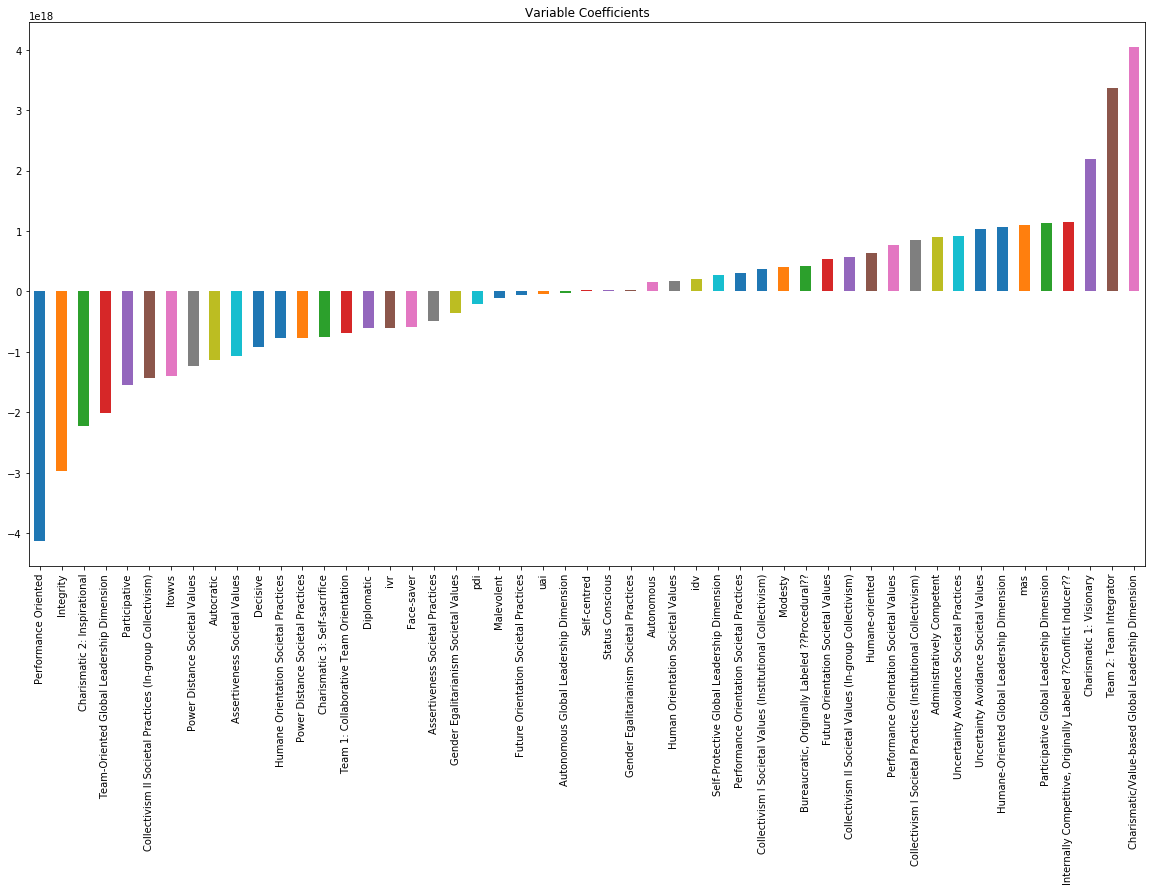

In [79]:
from pandas import Series
predictors = df_ml3.columns

coef = Series(lin_reg.coef_,predictors).sort_values()

coef.plot(kind='bar', title='Variable Coefficients')
plt.gcf().set_size_inches(20, 10)

#### 3.3.2 Check the absolute value of the t-statistics for each model parameter


### 3.4 Short-list the top three to five most promising models
 

## 4. Fine-tune the models

### 4.1. Fine-tune the hyperparameters using cross-validation
- GridSearch CV 

In [114]:
# find optimal alpha with grid search
#Lasso regression
alpha = [0.001, 0.01, 0.1, 1, 10, 500, 1000, 1500]
param_grid = dict(alpha=alpha)
grid_lasso = GridSearchCV(estimator=lasso, param_grid=param_grid, scoring='r2', verbose=1, cv=5) #n_jobs=-1)
grid_lasso_result = grid_lasso.fit(df_ml_prepared, df_ml3_labels,)
print('Best Score: ', grid_lasso_result.best_score_)
print('Best Params: ', grid_lasso_result.best_params_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Jeeho\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 133226661788.83194, tolerance: 39404863.498401895
  positive)
C:\Users\Jeeho\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 28851049081.41156, tolerance: 32907022.59277405
  positive)
C:\Users\Jeeho\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 165167331676.74597, tolerance: 38163716.60140286
  positive)
C:\Users\Jeeho\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Object

Best Score:  -0.10598488286832106
Best Params:  {'alpha': 1500}


In [115]:
# find optimal alpha with grid search
#Elastic-Net regression
alpha = [0.001, 0.01, 0.1, 1, 10, 500, 1000, 1500]
l1_ratio = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
param_grid = dict(alpha=alpha, l1_ratio=l1_ratio)

grid_elastic = GridSearchCV(estimator=Elastic_reg, param_grid=param_grid, scoring='r2', verbose=1, n_jobs=-1)
grid_elastic_result = grid_elastic.fit(df_ml_prepared, df_ml3_labels,)
print('Best Score: ', grid_elastic_result.best_score_)
print('Best Params: ', grid_elastic_result.best_params_)

Fitting 5 folds for each of 88 candidates, totalling 440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 200 tasks      | elapsed:    1.2s


Best Score:  -0.0360369709679643
Best Params:  {'alpha': 1500, 'l1_ratio': 0}


[Parallel(n_jobs=-1)]: Done 440 out of 440 | elapsed:    1.7s finished
C:\Users\Jeeho\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 223618130752.81146, tolerance: 44736129.36160352
  positive)


In [116]:
grid_lasso.best_estimator_

Lasso(alpha=1500, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [119]:
grid_elastic.best_estimator_


ElasticNet(alpha=1500, copy_X=True, fit_intercept=True, l1_ratio=0,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)